### Simple Linear Regression

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

from pylab import rcParams
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale

In [3]:
%matplotlib inline
rcParams['figure.figsize'] = 10,8

In [4]:
rooms = 2*np.random.rand(100,1)+3
rooms[:10]

array([[3.31523427],
       [3.95503415],
       [3.95589838],
       [4.55946599],
       [4.8147926 ],
       [4.30191374],
       [4.1724727 ],
       [4.28177573],
       [3.13108246],
       [3.83906151]])

In [5]:
price = 265 + 6*rooms + abs(np.random.randn(100,1))
price[:10]

array([[285.88385705],
       [288.95383885],
       [289.11476314],
       [292.80791559],
       [295.2250555 ],
       [292.742737  ],
       [290.20138492],
       [290.99078128],
       [285.33432645],
       [288.21825646]])

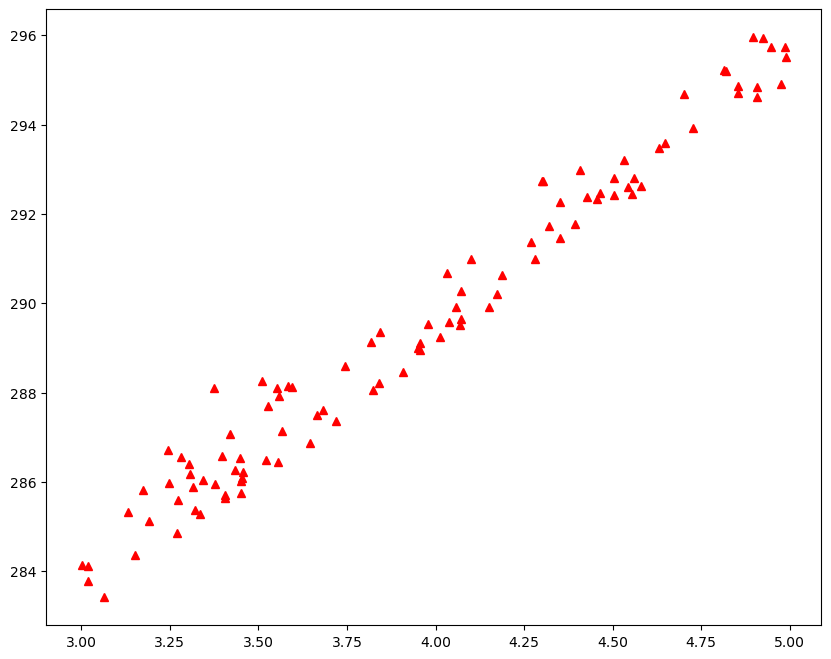

In [6]:
plt.plot(rooms,price,'r^')

In [7]:
# we can see there is linear relation between rooms and price and they are continuous

In [8]:
X= rooms
Y= price

Linreg = LinearRegression()
Linreg.fit(X,Y)
print(Linreg.intercept_, Linreg.coef_)

[266.45208665] [[5.83809735]]


*Simple Algebra*
- y=mx+b
- b=intercept = 265.09

- coef = 6.17 (estimated coefficients)

In [9]:
#score determines the model performance, if closer to 1 means good

print(Linreg.score(X,Y))

0.9697131216252811


### Multiple Linear Regression

In [10]:
import seaborn as sb
sb.set_style('whitegrid')
from collections import Counter

In [11]:
add =r"D:\Courses\New folder\Courses\Python for Data Science Essential Trainig Part 2\Ex_Files_Python_Data_Science_EssT_Pt2\Exercise Files\Data\enrollment_forecast.csv"
data=pd.read_csv(add)
data.columns = ['year','roll','unem','hgrad','inc']
data.head()

,year,roll,unem,hgrad,inc
0,1,5501,8.1,9552,1923
1,2,5945,7.0,9680,1961
2,3,6629,7.3,9731,1979
3,4,7556,7.5,11666,2030
4,5,8716,7.0,14675,2112


In [12]:
# year 1=1961, 2=1962
# roll -> enrollment numbers
# unem -> unemployement in that year
# hgrad -> graduation rate
# inc -> income in that year

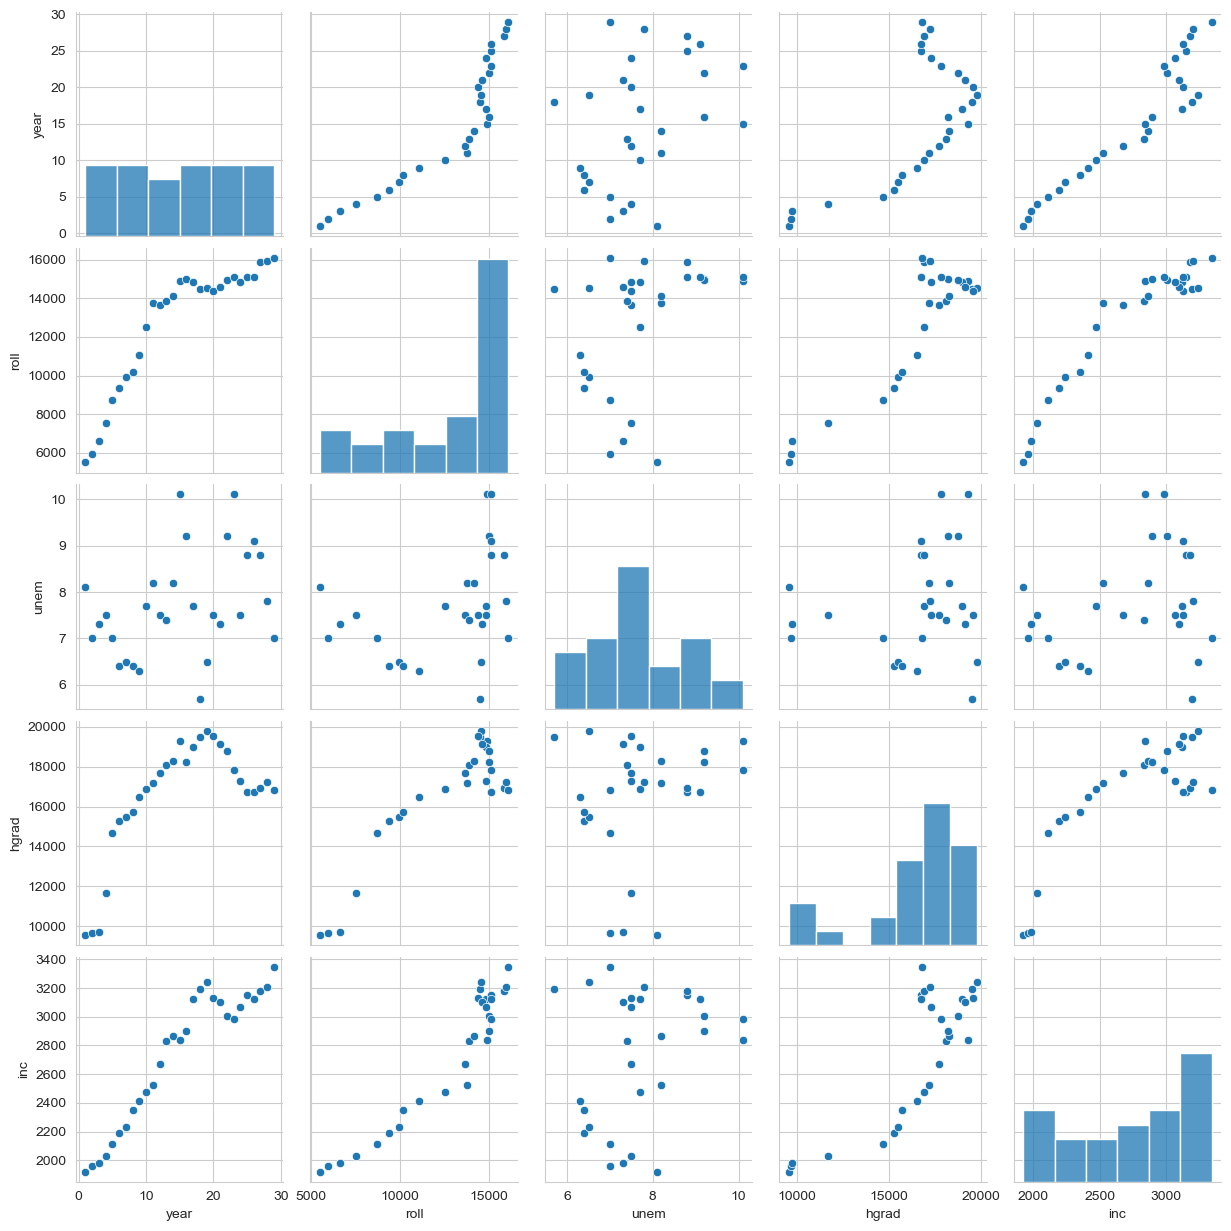

In [13]:
sb.pairplot(data)

In [14]:
print(data.corr())

           year      roll      unem     hgrad       inc
year   1.000000  0.900934  0.378305  0.670300  0.944287
roll   0.900934  1.000000  0.391344  0.890294  0.949876
unem   0.378305  0.391344  1.000000  0.177376  0.282310
hgrad  0.670300  0.890294  0.177376  1.000000  0.820089
inc    0.944287  0.949876  0.282310  0.820089  1.000000


In [15]:
# hgrad and unem are not showing linear correlation, so we use them as predectors

In [16]:
data1 = data[['unem','hgrad']].values

data1_target = data[['roll']].values
data1_names = ['unem','hgrad']

x,y = scale(data1),data1_target

In [17]:
# checking missing values
miss = x==np.NAN
x[miss]

array([], dtype=float64)

In [18]:
# above we get empty array, because there are no missing values

In [19]:
LinReg = LinearRegression(normalize =True)   #normalize will normalize our variables before regression
LinReg.fit(x,y)
print(LinReg.score(x,y))

0.8488812666133723


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [20]:
# score is R^2 of predection, its a measure of how well the regression line generated/predected by model actually matches the real values

## Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

In [22]:
add = r"D:\Courses\New folder\Courses\Python for Data Science Essential Trainig Part 2\Ex_Files_Python_Data_Science_EssT_Pt2\Exercise Files\Data\titanic-training-data.csv"
tit_train = pd.read_csv(add)
tit_train.columns = ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']
tit_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
tit_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Check Target variable is binary or not

<AxesSubplot:xlabel='Survived', ylabel='count'>

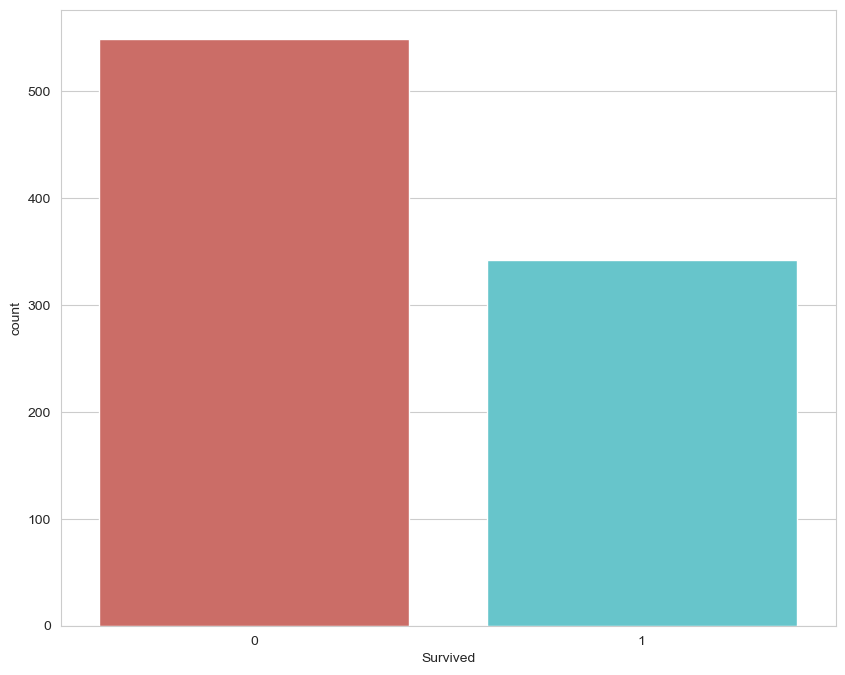

In [24]:
sb.countplot(x='Survived',data=tit_train,palette='hls')

In [25]:
# since above we got only 2 blocks, which means 'Survived' is binary variable

In [26]:
# checking missing values
tit_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Dropping missing and irrelevent variables

In [27]:
# cabin has lots of missing values, and its not necessary, so we will drop it
# name,Ticket columns are not relevent for prediction, so we will drop them too

tit_train = tit_train.drop(['Name','Cabin','Ticket'],axis=1)
tit_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


#### impute missing values in Age

In [28]:
# since age is important, we are filling missing values in age

<AxesSubplot:xlabel='Parch', ylabel='Age'>

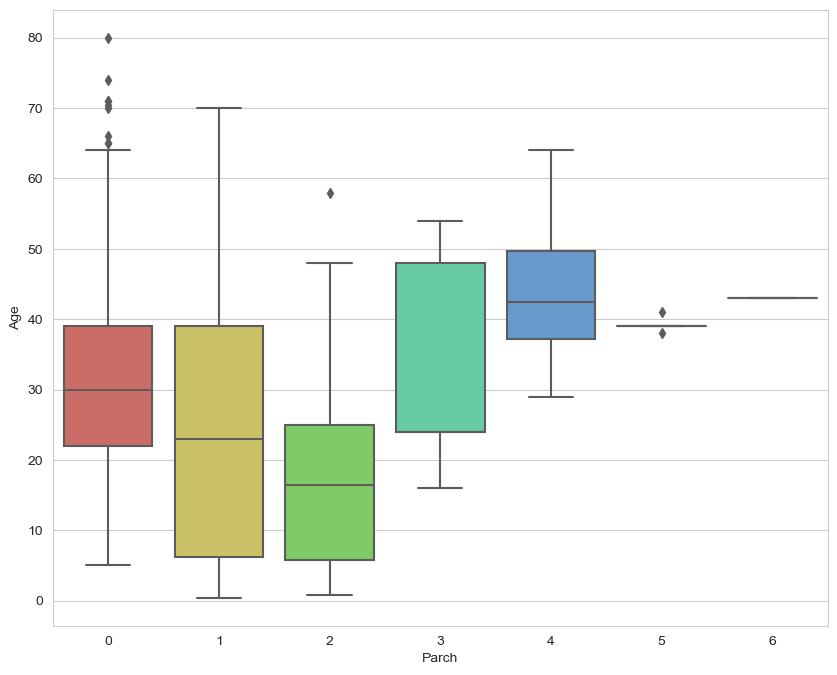

In [29]:
sb.boxplot(x='Parch',y='Age',data=tit_train,palette='hls')

In [30]:
# parch represents number of relatives on boat (either children/parents)
# above we can see there is a relation between Parch and Age, so we fill the missing Age values using Parch

In [31]:
# here group the data based on Parch and calculated the average age based on Prach group

parch_grp = tit_train.groupby(tit_train['Parch'])
parch_grp.mean()

,PassengerId,Survived,Pclass,Age,SibSp,Fare
Parch,,,,,,
0,445.255162,0.343658,2.321534,32.178503,0.237463,25.586774
1,465.110169,0.550847,2.203390,24.422000,1.084746,46.778180
2,416.662500,0.500000,2.275000,17.216912,2.062500,64.337604
3,579.200000,0.600000,2.600000,33.200000,1.000000,25.951660
4,384.000000,0.000000,2.500000,44.500000,0.750000,84.968750
5,435.200000,0.200000,3.000000,39.200000,0.600000,32.550000
6,679.000000,0.000000,3.000000,43.000000,1.000000,46.900000


In [32]:
def age_appr(cols):
    Age=cols[0]
    Parch=cols[1]
    
    if pd.isnull(Age):
        if Parch==0:
            return 32
        elif Parch==1:
            return 24
        elif Parch==2:
            return 17
        elif Parch==3:
            return 33
        elif Parch==4:
            return 44
        elif Parch==5:
            return 39
        else:
            return 43
    else:
        return Age

In [33]:
tit_train['Age']=tit_train[['Age','Parch']].apply(age_appr,axis=1)
tit_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

In [34]:
# we imputed missing values in Age

In [35]:
tit_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [36]:
# here we dropped 2 null embarked values
tit_train.dropna(inplace=True)
tit_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 69.5+ KB


#### convert categorical variables into dummy indicators

In [37]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# we need to convert Sex variable into numeric

gender_cat = tit_train['Sex']
gender_encoded = label_encoder.fit_transform(gender_cat)
gender_encoded[0:5]

array([1, 0, 0, 0, 1])

In [38]:
tit_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [39]:
# from above 2 we can see that 1=male and 0=female

In [40]:
gender_DF=pd.DataFrame(gender_encoded,columns=['male_gender'])
gender_DF.head()

,male_gender
0,1
1,0
2,0
3,0
4,1


In [41]:
## now we encode embarked variable
embarked_cat = tit_train['Embarked']
embarked_encoded = label_encoder.fit_transform(embarked_cat)
embarked_encoded[:100]

array([2, 0, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2,
       1, 2, 2, 2, 0, 2, 1, 2, 0, 0, 1, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0,
       1, 2, 1, 1, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2])

In [42]:
# here we converted embarked data into numerical, but its multinumerical,
# we need binaryu form, so we create 3 columns for specific port and give 0/1

In [43]:
from sklearn.preprocessing import OneHotEncoder
binary_encoder=OneHotEncoder(categories='auto')
embarked_1hot=binary_encoder.fit_transform(embarked_encoded.reshape(-1,1))
embarked_1hot_mat = embarked_1hot.toarray()
embarked_DF = pd.DataFrame(embarked_1hot_mat, columns=['C','Q','S'])
embarked_DF.head()

,C,Q,S
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [44]:
# above we used OneHotEncoder to convert into into different columns
# now we drop those original 'Sex' and 'Embarked' columns in our data

tit_train.drop(['Sex','Embarked'],axis=1,inplace=True)
tit_train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [45]:
# now we concatinate the newly encoded variables

tit_dmy = pd.concat([tit_train,gender_DF,embarked_DF],axis=1,verify_integrity=True).astype(float)
tit_dmy.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male_gender,C,Q,S
0,1.0,0.0,3.0,22.0,1.0,0.0,7.2500,1.0,0.0,0.0,1.0
1,2.0,1.0,1.0,38.0,1.0,0.0,71.2833,0.0,1.0,0.0,0.0
2,3.0,1.0,3.0,26.0,0.0,0.0,7.9250,0.0,0.0,0.0,1.0
3,4.0,1.0,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,0.0,1.0
4,5.0,0.0,3.0,35.0,0.0,0.0,8.0500,1.0,0.0,0.0,1.0


#### checking for independance between features

<AxesSubplot:>

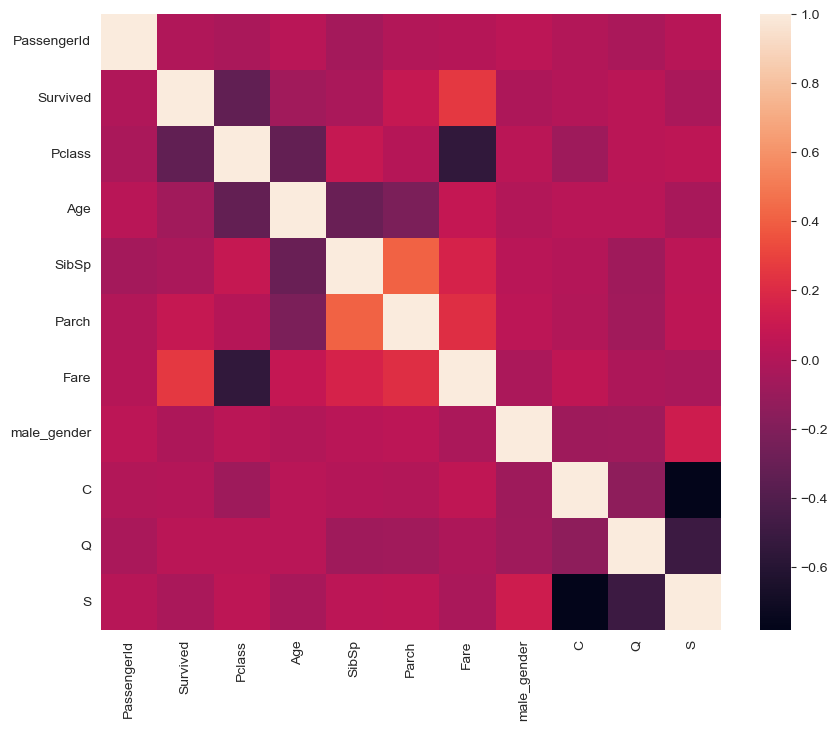

In [46]:
sb.heatmap(tit_dmy.corr())

In [47]:
# fare and pclass are not independent, from the color dark

tit_dmy.drop(['Fare','Pclass'],axis=1,inplace=True)
tit_dmy.head()

,PassengerId,Survived,Age,SibSp,Parch,male_gender,C,Q,S
0,1.0,0.0,22.0,1.0,0.0,1.0,0.0,0.0,1.0
1,2.0,1.0,38.0,1.0,0.0,0.0,1.0,0.0,0.0
2,3.0,1.0,26.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4.0,1.0,35.0,1.0,0.0,0.0,0.0,0.0,1.0
4,5.0,0.0,35.0,0.0,0.0,1.0,0.0,0.0,1.0


In [48]:
tit_dmy.dropna(inplace=True)
tit_dmy.isnull().sum()


PassengerId    0
Survived       0
Age            0
SibSp          0
Parch          0
male_gender    0
C              0
Q              0
S              0
dtype: int64

In [49]:
tit_dmy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 887 entries, 0 to 888
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  887 non-null    float64
 1   Survived     887 non-null    float64
 2   Age          887 non-null    float64
 3   SibSp        887 non-null    float64
 4   Parch        887 non-null    float64
 5   male_gender  887 non-null    float64
 6   C            887 non-null    float64
 7   Q            887 non-null    float64
 8   S            887 non-null    float64
dtypes: float64(9)
memory usage: 69.3 KB


In [50]:
## we have 887 records which are more than enough for logistic regression

In [51]:
X_train,X_test,Y_train,Y_test = train_test_split(tit_dmy.drop('Survived',axis=1),
                                                 tit_dmy['Survived'],test_size=0.2,
                                                 random_state=200)
# since we are predicting Survived variable, we drop it in X
# for Y which is predictant ie survived, 2nd argument
# 0.2 is for test 0.8 for train
# random state is like random seed

In [52]:
# both the shapes should be same
print(X_train.shape)
print(Y_train.shape)

(709, 8)
(709,)


In [53]:
X_train[:5]

,PassengerId,Age,SibSp,Parch,male_gender,C,Q,S
718,719.0,32.0,0.0,0.0,1.0,0.0,0.0,1.0
166,167.0,24.0,0.0,1.0,0.0,0.0,0.0,1.0
325,326.0,36.0,0.0,0.0,1.0,0.0,0.0,1.0
794,795.0,25.0,0.0,0.0,1.0,0.0,0.0,1.0
182,183.0,9.0,4.0,2.0,1.0,0.0,0.0,1.0


#### Deploying and Evaluating Model

In [54]:
LogReg = LogisticRegression(solver='liblinear')
LogReg.fit(X_train,Y_train)

LogisticRegression(solver='liblinear')

In [55]:
y_pred = LogReg.predict(X_test)

#### Model Evaluation

##### Classification Report

In [56]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.67      0.96      0.79       114
         1.0       0.69      0.14      0.23        64

    accuracy                           0.67       178
   macro avg       0.68      0.55      0.51       178
weighted avg       0.68      0.67      0.59       178



In [57]:
# we got a precesion of 69%

##### K-fold cross validation & confusion matrics

In [58]:
y_train_pred = cross_val_predict(LogReg,X_train,Y_train,cv=5)
confusion_matrix(Y_train,y_train_pred)

array([[415,  19],
       [248,  27]], dtype=int64)

In [59]:
# this means 408 & 48  are number of correct predictions, 227 & 26 are number of incorrect predictions

In [60]:
precision_score(Y_train,y_train_pred)

0.5869565217391305

##### Make a test Prediction

In [61]:
tit_dmy[863:864]

,PassengerId,Survived,Age,SibSp,Parch,male_gender,C,Q,S
865,866.0,1.0,42.0,0.0,0.0,1.0,0.0,0.0,1.0


In [62]:
test_pass = np.array([866,40,0,0,1,0,0,1]).reshape(1,-1)

print(LogReg.predict(test_pass))
print(LogReg.predict_proba(test_pass))

[0.]
[[0.64398002 0.35601998]]


C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
